###**Nama**: Azisya Luthfi Bintang
###**NIM** : 2022071051
###**Matkul** : Desain Analisis dan Algoritma Pertemuan 14

---

####Kasus *Fraud Analytics*

In [1]:
#Import library yang akan digunakan

import networkx as nx
import matplotlib.pyplot as plt

In [2]:
vertices = range(1, 10)
edges = [(7,2), (2,3), (7,4), (4,5), (7,3), (7,5), (1,6), (1,7), (2,8), (2,9)]

In [3]:
G = nx.Graph()

In [4]:
G.add_nodes_from(vertices)
G.add_edges_from(edges)
pos = nx.spring_layout(G)

{1: Text(-0.5842804746386803, -0.06675925513499327, '1 NF'),
 2: Text(0.3496140717168862, 0.26293748985659315, '2 F'),
 3: Text(0.2768906409914835, -0.027030302964681133, '3 NF'),
 4: Text(0.039432675548251604, -0.5563695360118817, '4 NF'),
 5: Text(-0.2060099348492791, -0.5288789146611867, '5 F'),
 6: Text(-1.0, -0.019653569649153425, '6 F'),
 7: Text(-0.05481551752664842, -0.14488361146386755, '7 F'),
 8: Text(0.7700610299675821, 0.38923880922448045, '8 NF'),
 9: Text(0.40910750879040475, 0.6913988908046896, '9 NF')}

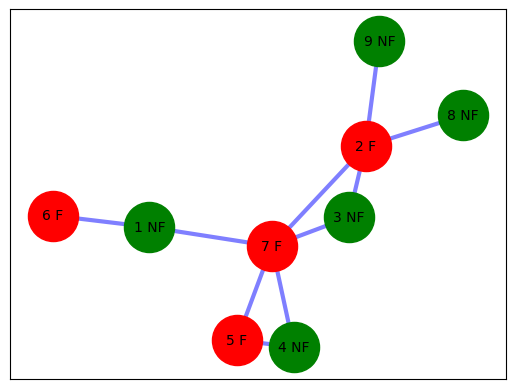

In [7]:
#Gambar noeds dan edeges beserta labelnya menggunakan NetworkX, NF berwarna hijau
#sedangkan F berwarna merah

nx.draw_networkx_nodes(G, pos, nodelist=[1,4,3,8,9], node_color='g', node_size=1300)
nx.draw_networkx_nodes(G, pos, nodelist=[2,5,6,7], node_color='r', node_size=1300)
nx.draw_networkx_edges(G, pos, edges, width=3, alpha=0.5, edge_color='b')
labels={}
labels[1]=r'1 NF'
labels[2]=r'2 F'
labels[3]=r'3 NF'
labels[4]=r'4 NF'
labels[5]=r'5 F'
labels[6]=r'6 F'
labels[7]=r'7 F'
labels[8]=r'8 NF'
labels[9]=r'9 NF'

nx.draw_networkx_labels(G, pos, labels, font_size=10)

---

####Neighbor & DOS values

{1: Text(-0.5842804746386803, -0.06675925513499327, '1 (2)'),
 2: Text(0.3496140717168862, 0.26293748985659315, '2 (4)'),
 3: Text(0.2768906409914835, -0.027030302964681133, '3 (2)'),
 4: Text(0.039432675548251604, -0.5563695360118817, '4 (2)'),
 5: Text(-0.2060099348492791, -0.5288789146611867, '5 (2)'),
 6: Text(-1.0, -0.019653569649153425, '6 (1)'),
 7: Text(-0.05481551752664842, -0.14488361146386755, '7 (5)'),
 8: Text(0.7700610299675821, 0.38923880922448045, '8 (1)'),
 9: Text(0.40910750879040475, 0.6913988908046896, '9 (1)')}

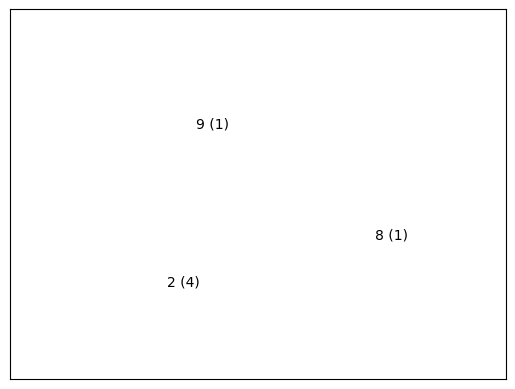

In [9]:
#Calculate DOS for each node

def calculate_dos(node):
  dos = 0
  for neighbor in G.neighbors(node):
    if labels[neighbor] != labels[node]:
      dos +=1
  return dos

dos_values = {node: calculate_dos(node) for node in G.nodes()}
labels = {node: f'{node} ({dos_values[node]})' for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=10)

---

####DOS Normalized

In [10]:
#Membuat graph
G = nx.Graph()

#Menambahkan vertices dan edges
vertices = range(1, 10)
edges = [(7,2), (2,3), (7,4), (4,5), (7,3), (7,5), (1,6), (1,7), (2,8), (2,9)]
G.add_nodes_from(vertices)
G.add_edges_from(edges)

#Menghitung derajat setiap node
degree_values = dict(G.degree())

#DOS Values (Derajat tanpa normalisasi)
dos_values = {node: degree for node, degree in degree_values.items()}

#menampilkan DOS Values
print("DOS Value :")
for node, dos in dos_values.items():
  print(f'{node}: {dos}')

#Normalisasi nilai derajat ke dalam rentang 0.9
max_degree = max(degree_values.values())

#Menghitung DOS Values (Derajat yang dinormalisasi)
normalized_dos_values = {node: round((degree/max_degree) * 9, 2) for node,
                         degree in degree_values.items()}

#Menampilkan DOS values (Derajat yang sudah dinormalisasikan)
print("\nNormalized DOS Values :")
for node, normalized_dos in normalized_dos_values.items():
  print(f'{node}: {normalized_dos}')


DOS Value :
1: 2
2: 4
3: 2
4: 2
5: 2
6: 1
7: 5
8: 1
9: 1

Normalized DOS Values :
1: 3.6
2: 7.2
3: 3.6
4: 3.6
5: 3.6
6: 1.8
7: 9.0
8: 1.8
9: 1.8


---

####Latihan 1

{1: Text(-0.0755933686053285, 0.14169085554431154, '1 F'),
 2: Text(-0.2152715862003393, 0.09879650164995349, '2 NF'),
 3: Text(-0.33563660345449, 0.04594208642571997, '3 NF'),
 4: Text(-0.4903067678020982, 0.08392227684400068, '4 F'),
 5: Text(-0.12111826852722253, -0.19515698725975963, '5 F'),
 6: Text(-0.16608528952069282, -0.027247296457908216, '6 NF'),
 7: Text(0.02835464894254258, 0.021774390253855313, '7 F'),
 8: Text(0.15115575846276372, -0.07907948970611708, '8 NF'),
 9: Text(0.05944977166041189, -0.10810533948383214, '9 NF'),
 10: Text(0.16505170504445338, 0.12196698663807973, '10 F')}

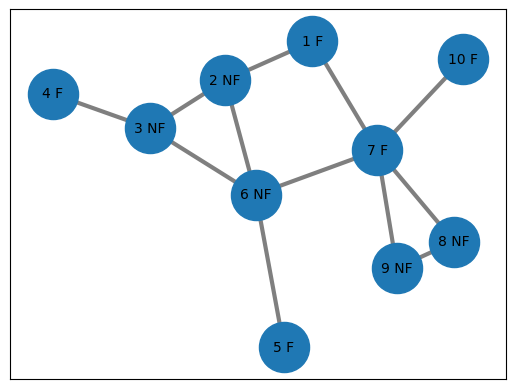

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

vertices = range(1, 12)
edges = [(1,2), (1,7), (2,3), (2,6), (3,4), (3,6), (6,5), (6,7), (7,10), (7,8), (7,9), (8, 9)]

G = nx.Graph()

G.add_nodes_from(vertices)
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=[1,2,3,4,5,6,7,8,9,10], node_size=1300)
nx.draw_networkx_edges(G, pos, edges, width=3, alpha=0.5)
labels={}
labels[1]=r'1 F'
labels[2]=r'2 NF'
labels[3]=r'3 NF'
labels[4]=r'4 F'
labels[5]=r'5 F'
labels[6]=r'6 NF'
labels[7]=r'7 F'
labels[8]=r'8 NF'
labels[9]=r'9 NF'
labels[10]= r'10 F'

nx.draw_networkx_labels(G, pos, labels, font_size=10)

---

####Latihan 2

{1: Text(0.024923033795877573, -0.12721645605066226, '1 F'),
 2: Text(0.10422702336024484, -0.1599503228578376, '2 F'),
 3: Text(0.11277449469409984, -0.03458571991376043, '3 F'),
 4: Text(-0.013259966554875173, 0.1651327498752831, '4 NF'),
 5: Text(-0.0894397884972893, 0.2745967093261382, '5 NF'),
 6: Text(-0.028798350440319895, 0.32672445759113405, '6 NF'),
 7: Text(-0.1453526101503672, 0.23456674589441584, '7 NF'),
 8: Text(-0.16919631794708653, 0.3533308378663582, '8 NF'),
 9: Text(-0.10297620852375379, 0.4394602494773339, '9 NF'),
 10: Text(0.23676995893436265, 0.00477390830851135, '10 F'),
 11: Text(0.2308872162660046, -0.0799426918751754, '11 F'),
 12: Text(0.20387648723695878, -0.17510767733181892, '12 F'),
 13: Text(0.2905565672391148, -0.2919723916106688, '13 NF')}

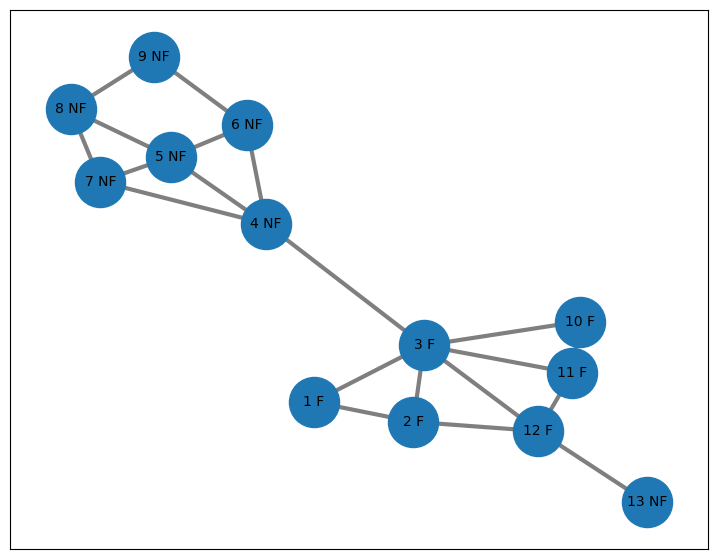

In [20]:
vertices = range(1, 20)
edges = [(1,2), (1,3), (2,3), (2,12), (3,12), (3,11), (3,10), (3,4), (12,11), (12,13),
         (11,10), (4, 6), (4,5), (4,7), (5,6), (5,7), (5,8), (6,9), (7,8), (8,9)]

G = nx.Graph()

plt.figure(figsize=(9, 7))

G.add_nodes_from(vertices)
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=[1,2,3,4,5,6,7,8,9,10,11,12,13], node_size=1300)
nx.draw_networkx_edges(G, pos, edges, width=3, alpha=0.5)
labels={}
labels[1]=r'1 F'
labels[2]=r'2 F'
labels[3]=r'3 F'
labels[4]=r'4 NF'
labels[5]=r'5 NF'
labels[6]=r'6 NF'
labels[7]=r'7 NF'
labels[8]=r'8 NF'
labels[9]=r'9 NF'
labels[10]= r'10 F'
labels[11]= r'11 F'
labels[12]= r'12 F'
labels[13]= r'13 NF'

nx.draw_networkx_labels(G, pos, labels, font_size=10)